In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = load_breast_cancer()
x,y = data.data, data.target

In [3]:
print("Feature shape: ", x.shape)
print("Target shape: ", y.shape)

Feature shape:  (569, 30)
Target shape:  (569,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42, stratify = y)

In [5]:
model = LogisticRegression(max_iter = 5000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [6]:
y_pred = model.predict(x_test)

In [7]:
print("\n Accuracy score ", accuracy_score(y_test, y_pred))
print("\n Confuison matrix ", confusion_matrix(y_test, y_pred))
print("\n classification report ", classification_report(y_test, y_pred))


 Accuracy score  0.9649122807017544

 Confuison matrix  [[39  3]
 [ 1 71]]

 classification report                precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



 # use Titanic.csv file 

In [17]:
data = pd.read_csv('Titanic-Dataset.csv')
print(data.sample(5))

     PassengerId  Survived  Pclass                                      Name  \
148          149         0       2  Navratil, Mr. Michel ("Louis M Hoffman")   
819          820         0       3              Skoog, Master. Karl Thorsten   
643          644         1       3                           Foo, Mr. Choong   
641          642         1       1                      Sagesser, Mlle. Emma   
589          590         0       3                       Murdlin, Mr. Joseph   

        Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
148    male  36.5      0      2      230080  26.0000    F2        S  
819    male  10.0      3      2      347088  27.9000   NaN        S  
643    male   NaN      0      0        1601  56.4958   NaN        S  
641  female  24.0      0      0    PC 17477  69.3000   B35        C  
589    male   NaN      0      0  A./5. 3235   8.0500   NaN        S  


In [18]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"
data = data[features + [target]]

In [20]:
#handle missing values
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [21]:
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

In [22]:
x = data.drop(target, axis=1)
y = data[target]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [25]:
y_pred = model.predict(x_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168

Confusion Matrix:
 [[98 12]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



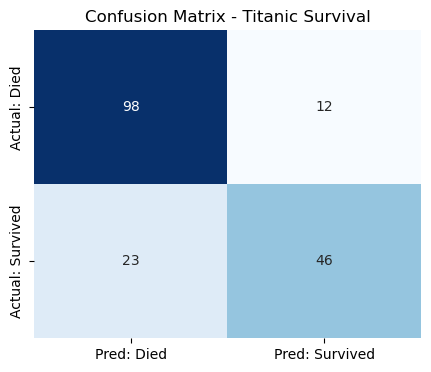

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Pred: Died", "Pred: Survived"],
            yticklabels=["Actual: Died", "Actual: Survived"])
plt.title("Confusion Matrix - Titanic Survival")
plt.show()